# Price Predictor for an Estate 
## Took from Boston Housing Data

    Features in the housing data
    
    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built 
                 prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per 10,000 USD
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of 
                 blacks by town
    13. LSTAT    % lower status of the population
    14. MEDV     Median value of owner-occupied homes in 1000's USD

In [1]:
import pandas as pd
import numpy as np

In [2]:
housing = pd.read_csv("data.csv") #housing DataFrame

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

Note: This field is rather interesting because while creating training and teting data set, it may so happen that all entries with 'CHAS' value = 0 is present in the training dataset and our model does not know that the value can also be 1 for some entries.

In [5]:
%matplotlib inline

In [6]:
import matplotlib.pyplot as plt

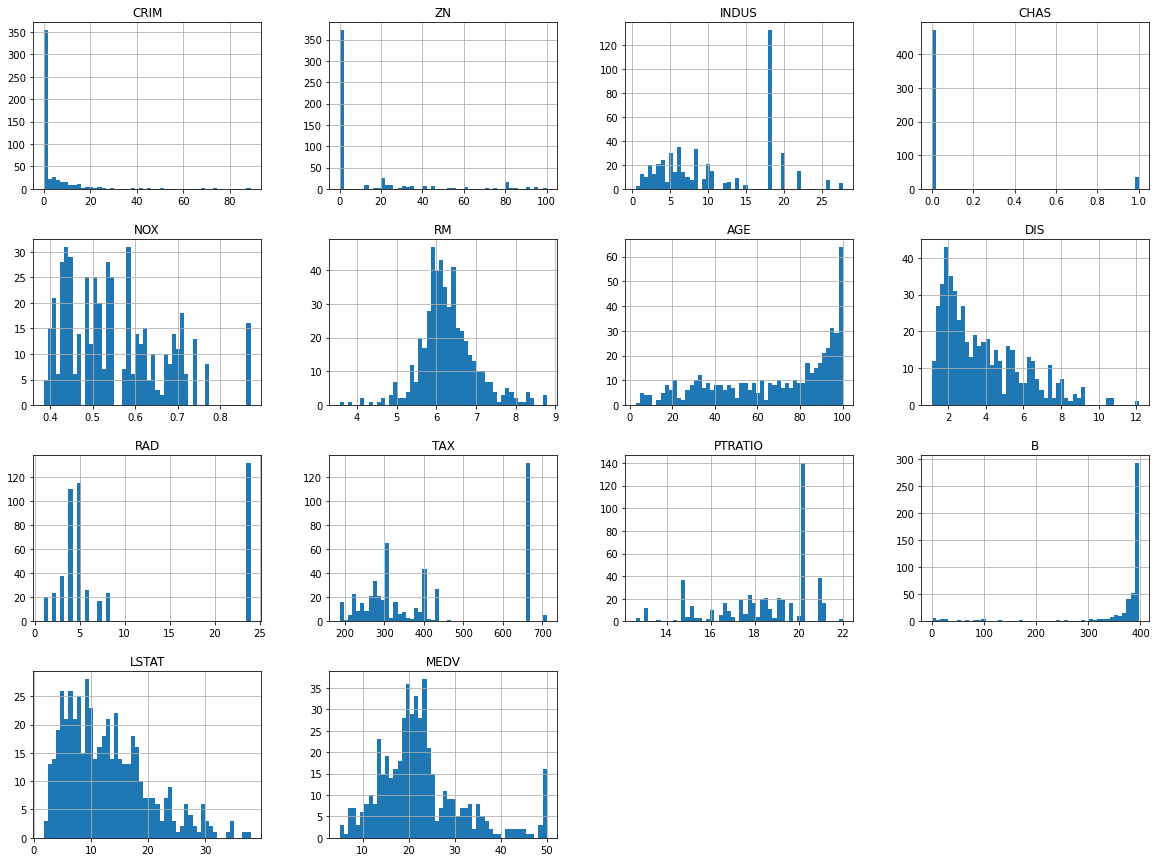

In [7]:
housing.hist(bins = 50, figsize = (20,15))
plt.show() #All features in the form of a histogram

## Train-Test Splitting

### Using scikit-learn

In [8]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 0)

Using StratifiedShuffleSplit based on entries in 'CHAS' so that entries with values 0 and 1 get distributed uniformly between training and testing dataset.

In [9]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

## Looking for correlations

In [10]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False) 
#This shows correlation of all the attributes with respect to MEDV (which is the median value of housing price)

MEDV       1.000000
RM         0.695081
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

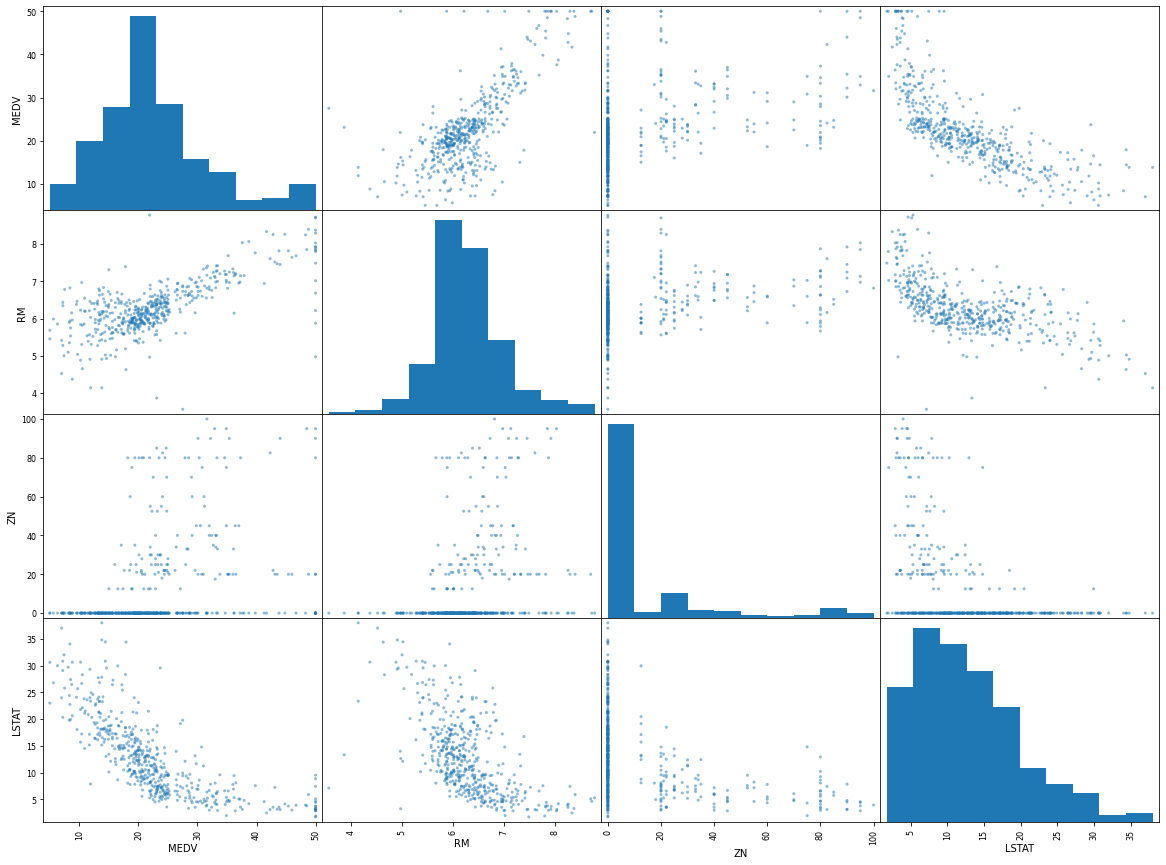

In [11]:
from pandas.plotting import scatter_matrix
attributes = ["MEDV", "RM", "ZN", "LSTAT"]
scatter_matrix(housing[attributes], figsize = (20,15))
plt.show()
#This shows correlation of each of attributes with each other

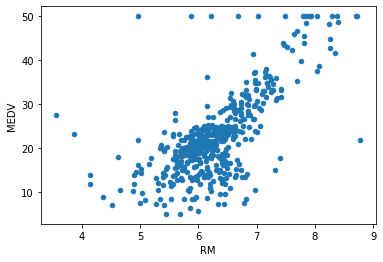

In [12]:
housing.plot(kind="scatter", x="RM", y="MEDV")
plt.show()

## Trying Out Attribute Combinations

In [13]:
housing["TAXRM"] = housing["TAX"]/ housing["RM"]

In [14]:
housing.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,45.019011
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,37.688834
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,33.681280
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,31.723350
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,31.061984


In [15]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False) 
#This shows correlation of all the attributes with respect to MEDV (which is the median value of housing price)

MEDV       1.000000
RM         0.695081
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
TAXRM     -0.538066
LSTAT     -0.737663
Name: MEDV, dtype: float64

In [16]:
#Surprisingly, we got a new attribute with a high negative correlation

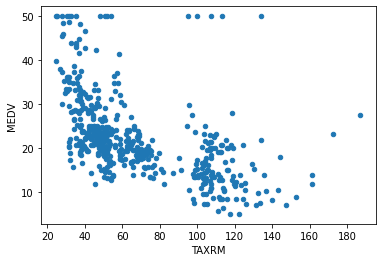

In [17]:
housing.plot(kind="scatter", x="TAXRM", y="MEDV")
plt.show()

### Separating features and label

In [18]:
housing = strat_train_set.drop("MEDV", axis = 1)
housing_label = strat_train_set["MEDV"].copy()

## Taking care of missing attributes

In [19]:
housing = strat_train_set.copy()

In [20]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [21]:
X =  imputer.transform(housing)
housing_tr = pd.DataFrame(X, columns = housing.columns)
#transformed dataframe 

# Creating Pipeline

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
#    ....add as many as you need in your pipeline
    ('std_scaler', StandardScaler())
])

In [23]:
housing_num_tr = my_pipeline.fit_transform(housing_tr)

## Selecting a desired model

In [24]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
from sklearn.tree import DecisionTreeRegressor
# model = DecisionTreeRegressor()

In [25]:
model.fit(housing_num_tr, housing_label)

LinearRegression()

In [26]:
some_data = housing.iloc[:5]
some_label = housing_label.iloc[:5]

In [27]:
prepared_data = my_pipeline.transform(some_data)

In [28]:
model.predict(prepared_data)

array([33. , 15.6, 10.2, 21.4, 24.6])

In [29]:
list(some_label)

[33.0, 15.6, 10.2, 21.4, 24.6]

## Evaluating the model

In [30]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_label, housing_predictions)
rmse = np.sqrt(mse)

In [31]:
mse

1.8225498692049726e-27

## Cross Validation Technique

In [32]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_label, scoring="neg_mean_squared_error", cv=10)
rmse_scores  =np.sqrt(-scores)


In [33]:
def print_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Std Deviation: ", scores.std())

In [34]:
print_scores(rmse_scores)

Scores:  [9.11755326e-14 9.92308129e-14 2.29957860e-14 4.89322594e-14
 5.77855460e-14 2.50337937e-14 2.87054813e-14 1.00446756e-13
 5.35940430e-14 6.34795973e-14]
Mean:  5.913796076711587e-14
Std Deviation:  2.8091486854823057e-14


In [35]:
from joblib import dump, load
dump(model, "PricePredictor.joblib")

['PricePredictor.joblib']

## Testing Data

In [36]:
X_test = strat_test_set.drop("MEDV", axis=1)
Y_test  =strat_test_set["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

/home/codeinex/.local/lib/python3.8/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names seen at fit time, yet now missing:
- MEDV

  warnings.warn(message, FutureWarning)


ValueError: X has 13 features, but SimpleImputer is expecting 14 features as input.